In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
dict_helper = {'frog':'frogs.txt',
               'toad':'toads.txt',}


In [6]:
for folder,file in dict_helper.items():
  path = Path('data/anura')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/file, dest, max_pics=200)

In [7]:
classes = ['toad','frog']

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

toad


frog


In [9]:
bs = 32

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4,bs=16).normalize(imagenet_stats)

In [11]:
data.classes,data.c

(['frog', 'toad'], 2)

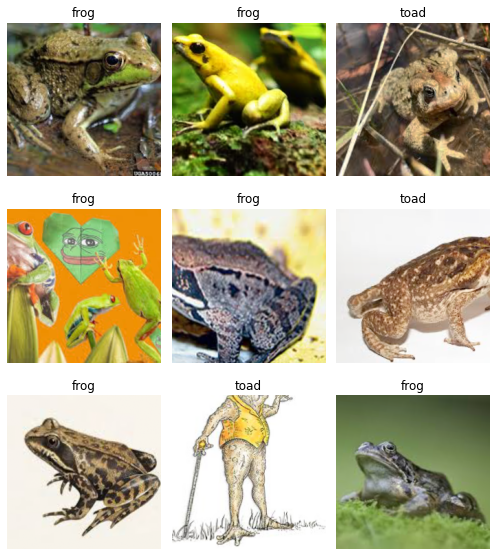

In [12]:
data.show_batch(rows=3,figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['frog', 'toad'], 2, 320, 80)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.809612,0.666474,0.237500,00:04
1,0.747022,0.578148,0.187500,00:04
2,0.634610,0.390253,0.150000,00:04
3,0.537714,0.396547,0.137500,00:04


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


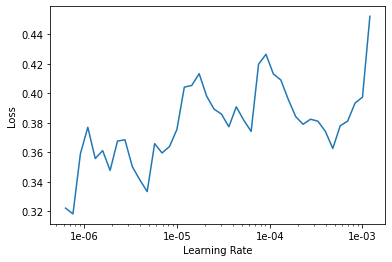

In [21]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(8, max_lr=slice(2e-6,2e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.100094,0.516886,0.150000,00:04
1,0.137398,0.526985,0.137500,00:04
2,0.153916,0.502906,0.125000,00:04
3,0.140701,0.512213,0.150000,00:04
4,0.142291,0.527858,0.150000,00:04
5,0.115179,0.504098,0.125000,00:04
6,0.114386,0.509700,0.112500,00:04
7,0.113890,0.494717,0.112500,00:04


In [24]:
learn.save('stage-2')

In [25]:
learn.load('stage-2');

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

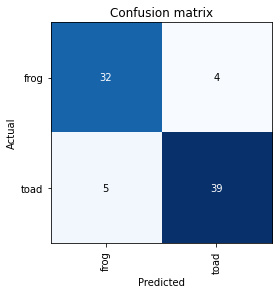

In [27]:
interp.plot_confusion_matrix()

In [28]:
interp.most_confused()

[('toad', 'frog', 5), ('frog', 'toad', 4)]

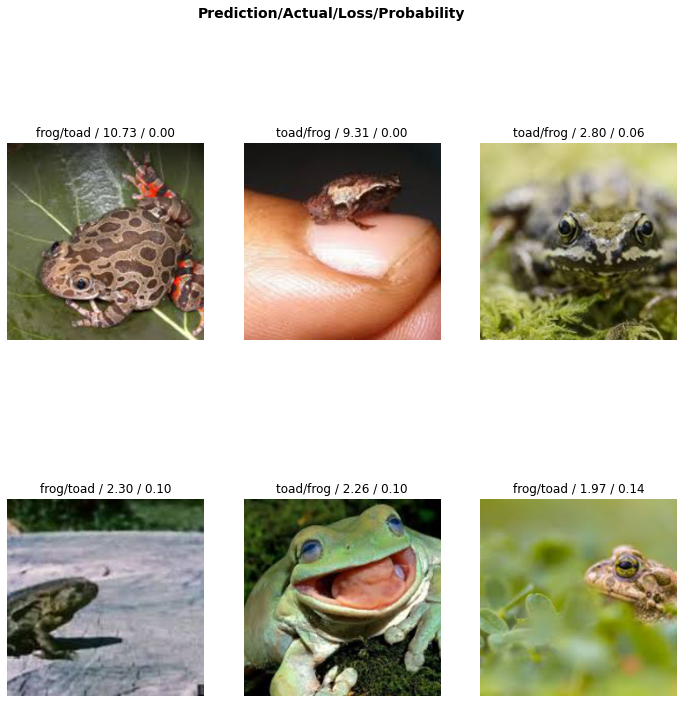

In [42]:
interp.plot_top_losses(6)

In [29]:
from fastai.widgets import *

In [30]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [31]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [32]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [33]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [34]:
learn.export()

In [35]:
defaults.device = torch.device('cpu')

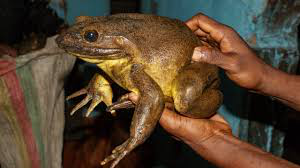

In [45]:
img = open_image(path/'frog'/'00000021.jpg')
img

In [46]:
learn = load_learner(path)

In [47]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'frog'

In [48]:
outputs

tensor([0.9908, 0.0092])